In [85]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
plt.rcParams["figure.figsize"] = (20, 10)

In [86]:
train = pd.read_csv('Google_Stock_Price_Train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
Date      1258 non-null object
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null object
Volume    1258 non-null object
dtypes: float64(3), object(3)
memory usage: 59.0+ KB


In [87]:
### to make label into a 2d numpy array
label = train.iloc[:,1:2]
label.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [88]:
### Feature Scaling , Using Normalization for a better result
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train = sc.fit_transform(label)

In [89]:
## for an lstm network t would be the train and validation shall be t+1 
x_train = train[0:1257]

In [90]:
y_train = train[1:1258]

In [91]:
x_train

array([[ 0.08581368],
       [ 0.09701243],
       [ 0.09433366],
       ..., 
       [ 0.95163331],
       [ 0.95725128],
       [ 0.93796041]])

In [92]:
y_train

array([[ 0.09701243],
       [ 0.09433366],
       [ 0.09156187],
       ..., 
       [ 0.95725128],
       [ 0.93796041],
       [ 0.93688146]])

The second price in x_train can be seen as the first price at y_Train

In [93]:
## for keras converting to 3d
x_train = np.reshape(x_train,(1257,1,1))

In [94]:
x_train

array([[[ 0.08581368]],

       [[ 0.09701243]],

       [[ 0.09433366]],

       ..., 
       [[ 0.95163331]],

       [[ 0.95725128]],

       [[ 0.93796041]]])

Converted to 3d array

In [95]:
import tensorflow as tf
from keras.layers import Dense,LSTM
from keras.models import Sequential

In [96]:
reg = Sequential()
## Input layer
reg.add(LSTM(units =4,activation = 'sigmoid',input_shape = (None , 1)))
## Output layer
reg.add(Dense(units = 1,kernel_initializer='uniform'))
#compiling the rnn 
reg.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [97]:
reg.fit(x_train,y_train,batch_size=40,epochs=200)

Epoch 1/200
1257/1257 [==============================] - 1s - loss: 0.2628     
Epoch 2/200
1257/1257 [==============================] - 0s - loss: 0.2118     
Epoch 3/200
1257/1257 [==============================] - 0s - loss: 0.1705     
Epoch 4/200
1257/1257 [==============================] - 0s - loss: 0.1384     
Epoch 5/200
1257/1257 [==============================] - 0s - loss: 0.1152     
Epoch 6/200
1257/1257 [==============================] - 0s - loss: 0.0994     
Epoch 7/200
1257/1257 [==============================] - 0s - loss: 0.0889     
Epoch 8/200
1257/1257 [==============================] - 0s - loss: 0.0827     
Epoch 9/200
1257/1257 [==============================] - 0s - loss: 0.0791     
Epoch 10/200
1257/1257 [==============================] - 0s - loss: 0.0770     
Epoch 11/200
1257/1257 [==============================] - 0s - loss: 0.0758     
Epoch 12/200
1257/1257 [==============================] - 0s - loss: 0.0749     
Epoch 13/200
1257/1257 [=============

1257/1257 [==============================] - 0s - loss: 9.3839e-04     
Epoch 102/200
1257/1257 [==============================] - 0s - loss: 8.6318e-04     
Epoch 103/200
1257/1257 [==============================] - 0s - loss: 7.9895e-04     
Epoch 104/200
1257/1257 [==============================] - 0s - loss: 7.4098e-04     
Epoch 105/200
1257/1257 [==============================] - 0s - loss: 6.9269e-04     
Epoch 106/200
1257/1257 [==============================] - 0s - loss: 6.4856e-04     
Epoch 107/200
1257/1257 [==============================] - 0s - loss: 6.1060e-04     
Epoch 108/200
1257/1257 [==============================] - 0s - loss: 5.7762e-04     
Epoch 109/200
1257/1257 [==============================] - 0s - loss: 5.5041e-04     
Epoch 110/200
1257/1257 [==============================] - 0s - loss: 5.2564e-04     
Epoch 111/200
1257/1257 [==============================] - 0s - loss: 5.0416e-04     
Epoch 112/200
1257/1257 [==============================] - 0s - loss

1257/1257 [==============================] - 0s - loss: 2.7074e-04     
Epoch 197/200
1257/1257 [==============================] - 0s - loss: 2.6835e-04     
Epoch 198/200
1257/1257 [==============================] - 0s - loss: 2.6727e-04     
Epoch 199/200
1257/1257 [==============================] - 0s - loss: 2.6687e-04     
Epoch 200/200
1257/1257 [==============================] - 0s - loss: 2.6802e-04     


In [98]:
test = pd.read_csv('Google_Stock_Price_Test.csv')
real_price = test.iloc[:,1:2].values
real_price

array([[ 778.81],
       [ 788.36],
       [ 786.08],
       [ 795.26],
       [ 806.4 ],
       [ 807.86],
       [ 805.  ],
       [ 807.14],
       [ 807.48],
       [ 807.08],
       [ 805.81],
       [ 805.12],
       [ 806.91],
       [ 807.25],
       [ 822.3 ],
       [ 829.62],
       [ 837.81],
       [ 834.71],
       [ 814.66],
       [ 796.86],
       [ 799.68]])

In [99]:
inp = sc.transform(real_price)
inp = np.reshape(inp , (21,1,1))
pred = reg.predict(inp)
pred = sc.inverse_transform(pred)

In [100]:
pred

array([[ 776.81573486],
       [ 785.63897705],
       [ 783.53417969],
       [ 792.00146484],
       [ 802.18023682],
       [ 802.90258789],
       [ 800.96551514],
       [ 802.54638672],
       [ 802.71466064],
       [ 802.51672363],
       [ 801.71014404],
       [ 801.0758667 ],
       [ 802.43261719],
       [ 802.60083008],
       [ 810.01708984],
       [ 813.60284424],
       [ 817.59887695],
       [ 816.08825684],
       [ 806.25982666],
       [ 793.47540283],
       [ 796.07183838]], dtype=float32)

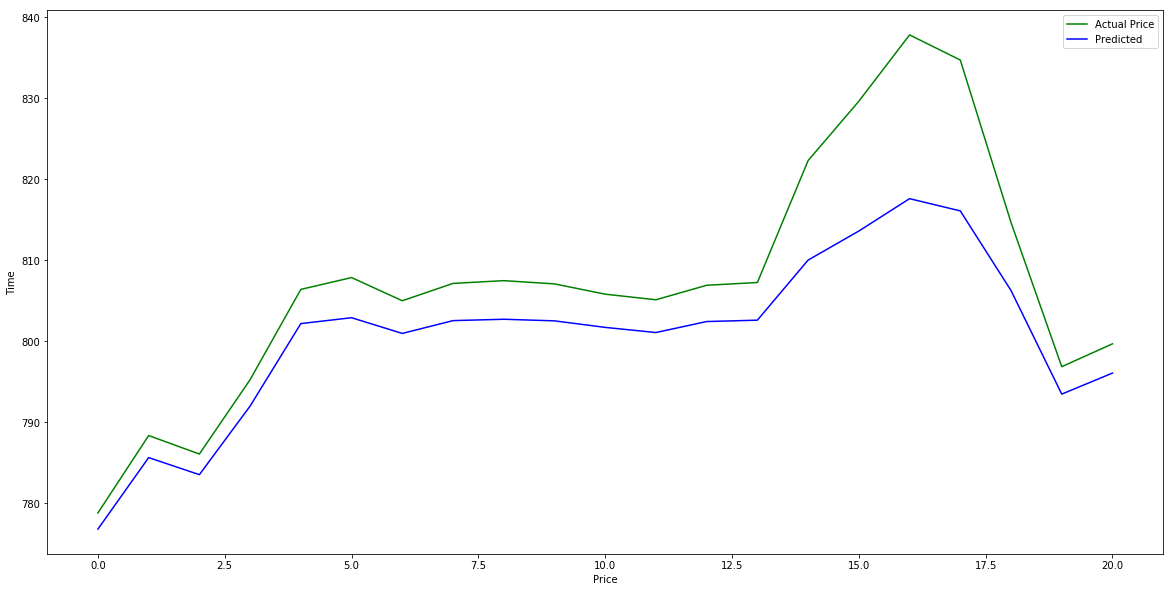

In [101]:
plt.plot(real_price,color = 'green',label = 'Actual Price')
plt.plot(pred,color = 'blue',label = 'Predicted')
plt.xlabel('Price')
plt.ylabel('Time')
plt.legend()
plt.show()

In [102]:
mean_squared_error(real_price,pred)

70.681606404813849

In [103]:
## Getting real train stock price 
realtrain = pd.read_csv('Google_Stock_Price_Train.csv')
realtrain = realtrain.iloc[:,1:2].values

In [104]:
predtrain = reg.predict(x_train)
predtrain = sc.inverse_transform(predtrain)
predtrain

array([[ 327.0027771 ],
       [ 332.38247681],
       [ 331.09152222],
       ..., 
       [ 787.77935791],
       [ 790.56396484],
       [ 780.99414062]], dtype=float32)

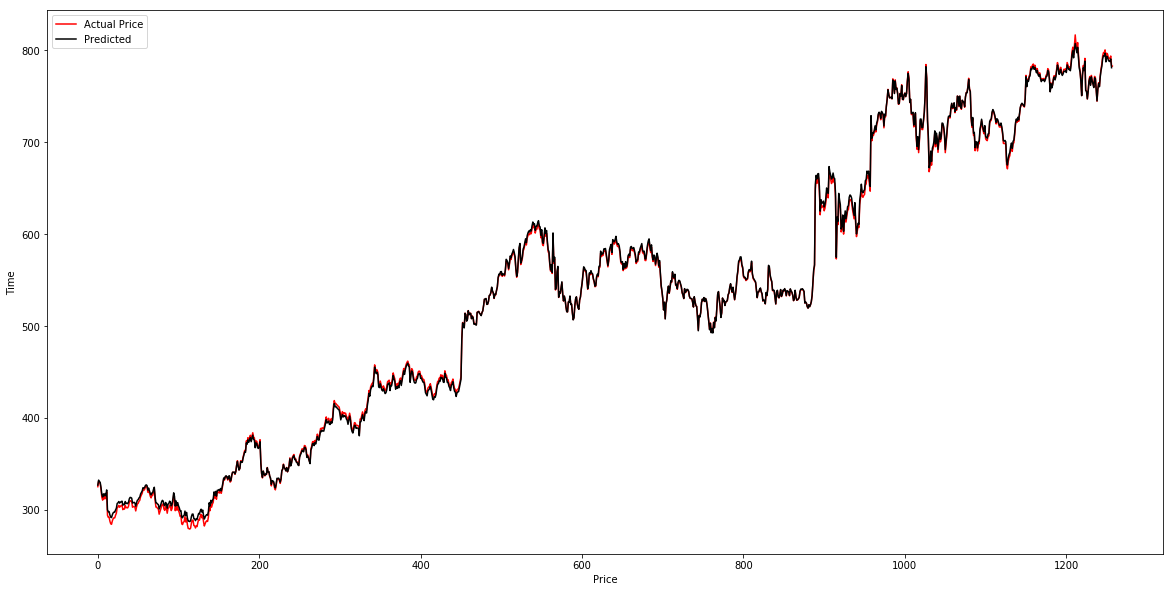

In [105]:
plt.plot(realtrain,color = 'red',label = 'Actual Price')
plt.plot(predtrain,color = 'black',label = 'Predicted')
plt.xlabel('Price')
plt.ylabel('Time')
plt.legend()
plt.show()

In [106]:
mean_squared_error(realtrain[0:-1],predtrain)

7.1794822360920829